In [248]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.datasets import load_wine

In [249]:
wine_ds = load_wine()
wine = pd.DataFrame(wine_ds.data,columns=wine_ds.feature_names)
wine['group']=wine_ds.target


In [250]:
wine.iloc[:,:3].describe()

,alcohol,malic_acid,ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='total_phenols'>,
        <AxesSubplot:xlabel='total_phenols', ylabel='total_phenols'>]],
      dtype=object)

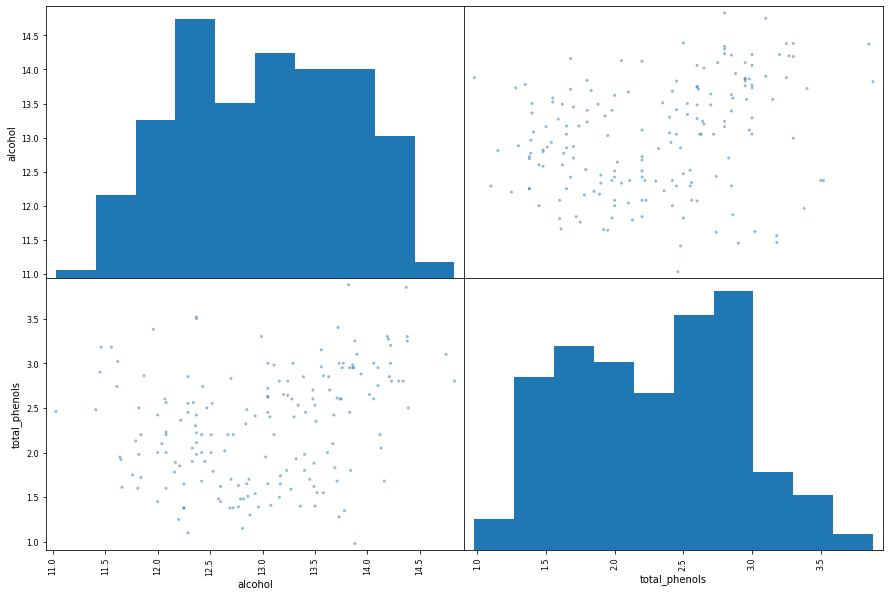

In [251]:
import matplotlib.pyplot as plt 
pd.plotting.scatter_matrix(wine.iloc[:,[0,5]],figsize=(15,10))

In [252]:
# Preprocessing Standardization
from sklearn.preprocessing import StandardScaler
X = wine[['alcohol','total_phenols']]
scale = StandardScaler()
scale.fit(X)

StandardScaler()

In [253]:
#scale.mean_
#scale.scale_ standard deviation


In [254]:
scaled_X = scale.transform(X)

# print(scaled_X.shape)
# print(X.shape)

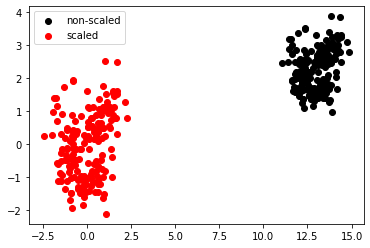

In [255]:
plt.scatter(X['alcohol'],X['total_phenols'],c='k',label='non-scaled')
plt.scatter(scaled_X[:,0],scaled_X[:,1],c='r',label='scaled')
plt.legend()
plt.show()

In [274]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_X)
y_pred = kmeans.predict(scaled_X)
print((y_pred==wine['group']).sum())

9


In [275]:
kmeans.cluster_centers_

array([[ 0.07498401, -1.14070754],
       [ 0.92017418,  0.87087204],
       [-1.06309124,  0.06418028]])

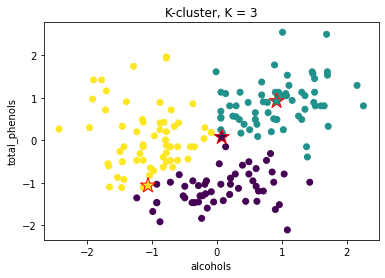

In [276]:
plt.scatter(scaled_X[:,0],scaled_X[:,1],c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,:1],marker='*',c=[1,2,3],s=250,edgecolors='r')
plt.xlabel('alcohols')
plt.ylabel('total_phenols')
plt.title('K-cluster, K = 3')
plt.show()

In [267]:
import numpy as np
X_new = np.array([[13,2.5]])
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)
kmeans.predict(X_new_scaled)

[[-0.00076337  0.32829793]]


array([1], dtype=int32)

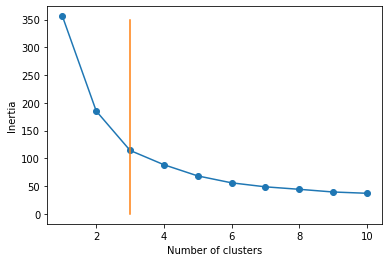

In [308]:
# calculate distortion for a range of number of cluster

inertia = []

for i in np.arange(1, 11):

    km = KMeans(

        n_clusters=i

    )

    km.fit(scaled_X)

    inertia.append(km.inertia_)



# plot

plt.plot(np.arange(1, 11), inertia, marker='o')

plt.xlabel('Number of clusters')

plt.ylabel('Inertia')

plt.plot((3,3),(0,350))

plt.show()

#For example, k=3 seems to be optimal, as we increase the number of clusters from 3 to 4, the decrease in inertia slows down significantly, compared to that from 2 to 3. This approach is called elbow method (can you see why?). It is a useful graphical tool to estimate the optimal k in k-means